# Kod skelett, struktur, val av features och EDA

## Kod skelett

**Lite korta tanker**

En .py med bara hur data settet ska hanteras och struktureras. En data wrangler som bara plockar fram det vi är interserade av och begränsar data till en hanterbar storlek.

En .py där vi kör modellen och tränar den.

En .py där vi intergrarerar med modellen och plockar fram informationen från en färdig körd modell. 

## Struktur och val av features

### Outline

**Data** - Tänker att vi gör ett medelvärde på ranking för varje film, mer än att hålla kol på alla röstningar och skalan. Den bör var i någon form av skalering eller normalisering, för att ge ett mer objektivt värde. Lägga till en column med medlet. 

Sedan bör gener kolumnen göras om till ett set. För att gör filtrering enklare i den kolumnen mot input filmen. 

**Mata in** - Beroende på tid. Hur avancerat detta ska vara. Om den bara ska plocka från en lista till ett inteface. Kanske bara kanappar in i consolen. Börja med modellerna och data settet. Så får vi se vad tid finns till detta. 

**Kanditat genrator** Frågan om en film matas in. Det plockas fram 20 filmer från en kanditats generator. Den ska var enkel och väldigt generell. Den plockar bara på gener. Är bara som ett första steg att hitta filmer som kan vara intressanta. Använda rannking som en "soft weight factore". Så inte popularitet får för stort fokus utan ger en mer balanserad filtrering av filmer. En scorer för likeheter i gener sedan mjuk rakning efter rakning. 

**Ranking** Här rankar vi filmerna efter betyg, kanske ett medel värde på rankingen här. Se om vi kan använda oss av tagarna i tags för att ranka filmerna här också. Frågan är bara lämpligt sätta att sätta rank. Men det blir väl att gämföra tags och rank mot filmen vi frågot efter rekomandationer från. **Får kolla mer på det**
Gallara fram 10 stycken här ifrån. *Kan vara värt att kolla kanditat filmernas gener mot varandra som första sortering här* Tanke är väl mest om det är tillexempel en komedi som också är en skräck film, men den in matade filmen är en barn komedi*

tf-idf eller embbeding och kör model mot dom vectorerna för förutse vilken filmer som passar best. 

**Andra överväganden** titta på villket år film gjorts, välj några nyare och några som är villkne ålder som helts. Kan åkse väg tiden då den senast blev rankad eller taggad. Kan också tittat på vad många som tagat och rankat filmen för att den ska röstast upp, hur mycket uppmärksamhet film drar. Kanske mer jämför kanditaterna mot varandra här mer än mot filmen som frågats att utgå ifrån. Här gallras dom fem fram. **Titta på vad som kan jämnföras mellan filmerna** **Är det värt att träna en modell på user engegment för filmerna här**

Engagment kollas mot en KNN model exemplevis och vägs mot hur ny filmen är jämnfört med input filmen och sedan väljs två efter nyhet och 3 efter engament. Får tänka hur bias är här för engement, för kommer var många filmer med mycket engament och några med få men knske inte bäst rekomandation. Behövs något att väg mot detta. **Ska tid väga, hur nyligen det varit aktivetet?**

**Tänk på** Hur fördelning ser ut bland filmerna mellan olika frågetställningar. Tillexempel om data setet jag valt ut har en jämn representering av varje film. Så kanske det blir svårt att titta på vad många som tagat filmen eller rankat. *Tänk* på bias! 

**Mata ut** Hänger på hur avancerat jag vill göra det. 

In [44]:
# Koden för EDA. Gör några funktioner som visar vad jag behöver för att undersöka data settet. 
# Några funktioner eller bara varibaler som vi kan kalla på i EDA och skriva lite om vad för slutatsat och val vi tar. 
# Bra början på en raport och komentarer till olika val vi gjort. 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [45]:
rating_data = pd.read_csv("../../Laboration_2_Film_Recommender/Data/ratings.csv")
movies_data = pd.read_csv("../../Laboration_2_Film_Recommender/Data/movies.csv")
tags_data = pd.read_csv("../../Laboration_2_Film_Recommender/Data/tags.csv")

## EDA 



In [46]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
movies_data["genres"].iloc[:15]

0     Adventure|Animation|Children|Comedy|Fantasy
1                      Adventure|Children|Fantasy
2                                  Comedy|Romance
3                            Comedy|Drama|Romance
4                                          Comedy
5                           Action|Crime|Thriller
6                                  Comedy|Romance
7                              Adventure|Children
8                                          Action
9                       Action|Adventure|Thriller
10                           Comedy|Drama|Romance
11                                  Comedy|Horror
12                   Adventure|Animation|Children
13                                          Drama
14                       Action|Adventure|Romance
Name: genres, dtype: object

In [48]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [49]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [50]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [51]:
tags_data.head(15)

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
5,14,58559,Atmospheric,1311530439
6,14,58559,Batman,1311530391
7,14,58559,comic book,1311530398
8,14,58559,dark,1311530428
9,14,58559,Heath Ledger,1311530404


In [52]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 71.1+ MB


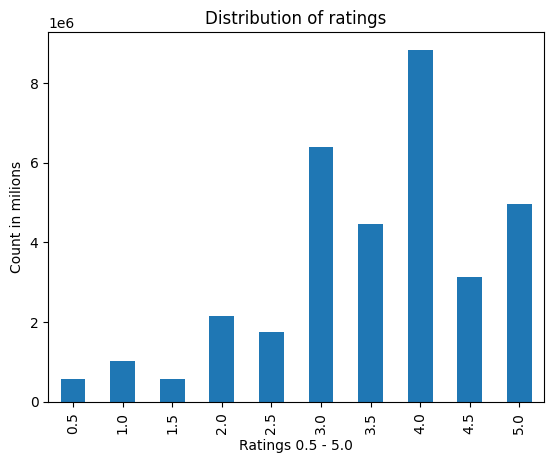

In [53]:
rating_data["rating"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Ratings 0.5 - 5.0")
plt.ylabel("Count in milions")
plt.title("Distribution of ratings")
plt.show();

In [54]:
len(rating_data["userId"].unique())

330975

In [56]:
len(tags_data["userId"].unique())

25280